In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
df=pd.read_csv("C:/Infosys Internship/Datasets/Finalized Dataset/diabetes_prediction_dataset.csv")

In [4]:
ohe_encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
std_scaler=StandardScaler()

In [5]:
Nominal_Col=['gender','smoking_history']
Nominal_transformed_df=ohe_encoder.fit_transform(df[Nominal_Col])
df=pd.concat([df,Nominal_transformed_df],axis=1).drop(columns=Nominal_Col)

In [6]:
Std_cols=['age','bmi','HbA1c_level','blood_glucose_level']
df[Std_cols]=std_scaler.fit_transform(df[Std_cols])

In [7]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

smote=SMOTE(random_state=42,sampling_strategy=0.3)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

In [10]:
model=LogisticRegression()

In [11]:
model.fit(X_train_res,y_train_res)

LogisticRegression()

In [12]:
prediction=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     30195
           1       0.65      0.76      0.70      2805

    accuracy                           0.94     33000
   macro avg       0.81      0.86      0.83     33000
weighted avg       0.95      0.94      0.95     33000

recall score0.7611408199643493


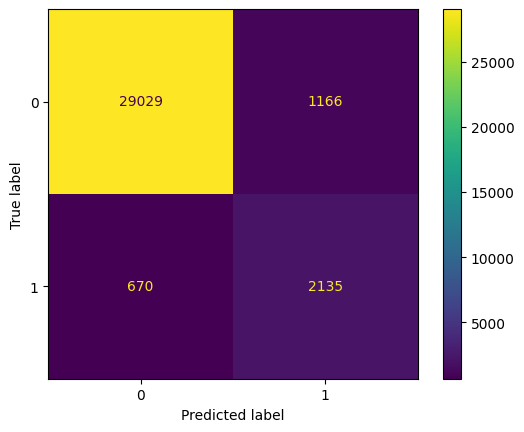

In [13]:
print(classification_report(y_test,prediction))
print(f"recall score{recall_score(y_test,prediction)}")

cm=confusion_matrix(y_test,prediction,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()


In [14]:
class_counts=df['diabetes'].value_counts()
print(class_counts)

majority_class=class_counts[0]
minority_class=class_counts[1]
ratio=majority_class/minority_class
print(f"Class Ratio(Majority:Minority):{ratio:.2f}:1")

diabetes
0    91500
1     8500
Name: count, dtype: int64
Class Ratio(Majority:Minority):10.76:1


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "Weighted  Logistic ":LogisticRegression(class_weight='balanced', max_iter=1000),
    
}

In [16]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [17]:
results = []
for name,model in models.items():
    model.fit(X_train_res,y_train_res)
    y_pred=model.predict(X_test)
    
    precision=precision_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    recall=recall_score(y_test,y_pred,average='macro')
    
    
    results.append({
        'model':name,
        'Precision':round(precision,3),
        'F1-Score':round(f1,3),
        'recall':round(recall,3)
    })
    
results_df=pd.DataFrame(results).sort_values(by='recall',ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18391, number of negative: 61305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1511
[LightGBM] [Info] Number of data points in the train set: 79696, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [65]:
results_df

,model,Precision,F1-Score,recall
7,XGBoost,0.946,0.921,0.904
8,LightGBM,0.958,0.956,0.888
9,Weighted Logistic,0.939,0.903,0.884
4,SVM,0.959,0.959,0.862
0,Logistic Regression,0.949,0.946,0.861
1,Decision Tree,0.950,0.948,0.857
2,Random Forest,0.965,0.965,0.853
3,Gradient Boosting,0.971,0.970,0.850
5,KNN,0.944,0.941,0.846
6,Naive Bayes,0.926,0.615,0.735


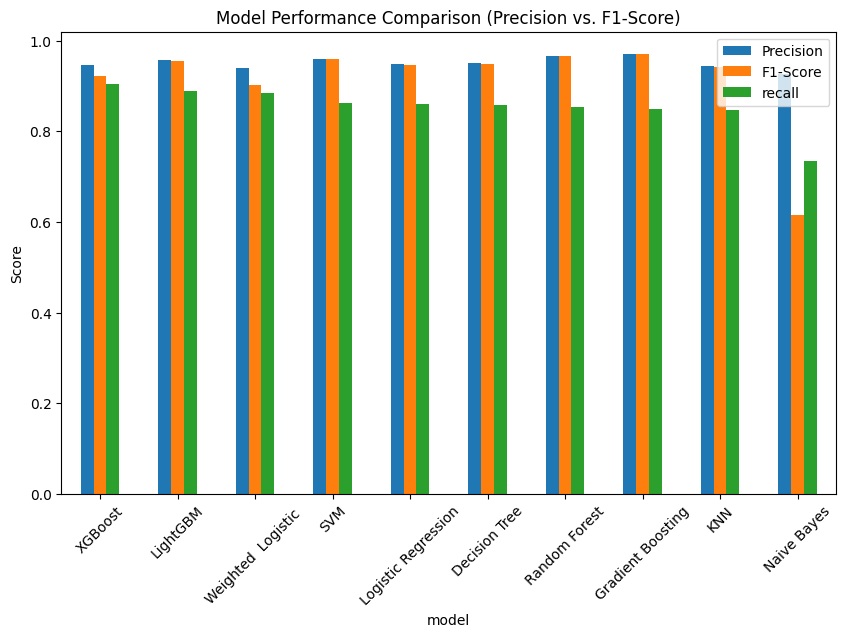

In [66]:
results_df.set_index("model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison (Precision vs. F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [69]:
def evaluate_model_performance(y_test, y_pred, model):
    """
    Evaluates the performance of a classification model by printing the classification report,
    precision score (as a percentage), and plotting the confusion matrix.

    Parameters:
        y_test (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model: Trained model object with a 'classes_' attribute.
    """
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Calculate and print precision score (rounded to nearest integer percentage)
    precision = recall_score(y_test, y_pred)
    print(f"recall_score: {round(precision * 100)}")
    
    # Compute confusion matrix using the labels from the model
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     30195
           1       0.48      0.90      0.63      2805

    accuracy                           0.91     33000
   macro avg       0.73      0.90      0.79     33000
weighted avg       0.95      0.91      0.92     33000

recall score0.899108734402852


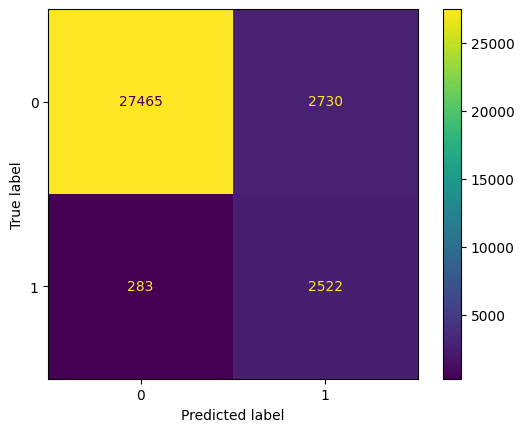

In [71]:
modelXGB_clf=XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss')
modelXGB_clf.fit(X_train_res,y_train_res)
model_prediction=modelXGB_clf.predict(X_test)



print(classification_report(y_test,model_prediction))
print(f"recall score{recall_score(y_test,model_prediction)}")

cm=confusion_matrix(y_test,model_prediction,labels=modelXGB_clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=modelXGB_clf.classes_)
disp.plot()




In [73]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   
    'max_depth': [3, 5, 7],                
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],         
    'gamma': [0, 0.1, 0.2],                
    'scale_pos_weight': [10.76, 15],       
    'n_estimators': [100, 200]              
}

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [75]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # Use 'aucpr' for AUC-PR
    random_state=42,
    device='gpu'
)